# 60mer design

## 0 Introduction
Investigation of the predicted (SignalP) and synthetic (AutoML) signal peptide sequences requires testing under lab conditions to measure the peptide abundances. In order to achieve this, an experimental design needs to be structured and set of primers should be constructed for the insertion of the desired signal peptide sequences into the chromosome of the _A. oryzae_ RIB40


### Agenda:
- Isolate the top 10-15 signalP sequences 
- Construct primers to insert singalP sequences 

In [1]:
import pandas as pd
from IPython.display import Image

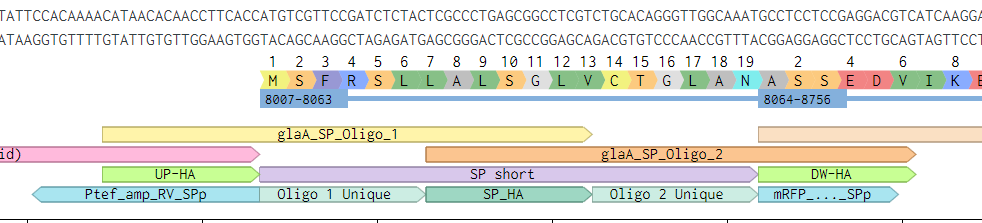

In [2]:
Image(filename='../Data/primer_design.png')

In [3]:
# Load the latest form of the singalP dataset
df_signalP = pd.read_csv('../Data/07_H2O_AutoML/ML_rnaseq_normalized_signal_peptides.csv')
df_signalP

,Accession,sequence,length,normalized abundances
0,AO090103000076,MLRVSAIFMACLLLATAA,18,9.256200e+08
1,AO090113000063,MPIKSFASRLALSLAICGTAM,21,3.866492e+08
2,AO090701000295,MHLPTLVTLACMAVSAS,17,2.478667e+08
3,AO090003000935,MEAFNLHNFLSSLYILLPFVILANPVH,27,1.733901e+08
4,AO090020000710,MKVAIFSTLLPLVLALPAPQT,21,1.108274e+08
...,...,...,...,...
1056,AO090103000483,MKTSFLLAAIGFLYRLPCS,19,0.000000e+00
1057,AO090103000487,MTRYLSFLFLLILFGNSVF,19,0.000000e+00
1058,AO090103000493,MRGIVALSFLSVALGVT,17,0.000000e+00
1059,AO090701000994,MRLLLIAPLFSAVSYGAQ,18,0.000000e+00


In [4]:
# Select only rows where "length" column is 23 or smaller
df_signalP_nucleotides_filtered = df_signalP[df_signalP["length"] <= 22]
df_signalP_nucleotides_filtered = df_signalP_nucleotides_filtered.reset_index(drop=True) # reset indexing and drop the old index
df_signalP_nucleotides_filtered

,Accession,sequence,length,normalized abundances
0,AO090103000076,MLRVSAIFMACLLLATAA,18,9.256200e+08
1,AO090113000063,MPIKSFASRLALSLAICGTAM,21,3.866492e+08
2,AO090701000295,MHLPTLVTLACMAVSAS,17,2.478667e+08
3,AO090020000710,MKVAIFSTLLPLVLALPAPQT,21,1.108274e+08
4,AO090020000162,MRSTLWSLLGLTGLAY,16,4.020455e+07
...,...,...,...,...
730,AO090103000483,MKTSFLLAAIGFLYRLPCS,19,0.000000e+00
731,AO090103000487,MTRYLSFLFLLILFGNSVF,19,0.000000e+00
732,AO090103000493,MRGIVALSFLSVALGVT,17,0.000000e+00
733,AO090701000994,MRLLLIAPLFSAVSYGAQ,18,0.000000e+00


In [5]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

peptide_records = []
for i, row in df_signalP.iterrows():
    sequence = row["sequence"]
    accession = row["Accession"]
    description=f"aa_length={row['length']} normalized_abundances={row['normalized abundances']}"
    record = SeqRecord(seq=Seq(sequence), id=accession, description=description)
    peptide_records.append(record)

In [6]:
peptide_records

[SeqRecord(seq=Seq('MLRVSAIFMACLLLATAA'), id='AO090103000076', name='<unknown name>', description='aa_length=18 normalized_abundances=925619983.9904914', dbxrefs=[]),
 SeqRecord(seq=Seq('MPIKSFASRLALSLAICGTAM'), id='AO090113000063', name='<unknown name>', description='aa_length=21 normalized_abundances=386649196.0842069', dbxrefs=[]),
 SeqRecord(seq=Seq('MHLPTLVTLACMAVSAS'), id='AO090701000295', name='<unknown name>', description='aa_length=17 normalized_abundances=247866661.2462808', dbxrefs=[]),
 SeqRecord(seq=Seq('MEAFNLHNFLSSLYILLPFVILANPVH'), id='AO090003000935', name='<unknown name>', description='aa_length=27 normalized_abundances=173390067.73336667', dbxrefs=[]),
 SeqRecord(seq=Seq('MKVAIFSTLLPLVLALPAPQT'), id='AO090020000710', name='<unknown name>', description='aa_length=21 normalized_abundances=110827365.99715652', dbxrefs=[]),
 SeqRecord(seq=Seq('MAVRIARFLGLSTVAYLALANGID'), id='AO090026000003', name='<unknown name>', description='aa_length=24 normalized_abundances=96897960.

In [7]:
# Filter SeqRecord objects that have amino acid length of 22 or less
peptide_records_22aa_filtered = []
for record in peptide_records:
    aa_length = int(record.description.split('=')[1].split()[0])
    if aa_length <= 22:
        peptide_records_22aa_filtered.append(record)

# Isolate top 25 of the filtered SeqRecord objects
peptide_records_22aa_top25 = peptide_records_22aa_filtered[:25]
peptide_records_22aa_top25

[SeqRecord(seq=Seq('MLRVSAIFMACLLLATAA'), id='AO090103000076', name='<unknown name>', description='aa_length=18 normalized_abundances=925619983.9904914', dbxrefs=[]),
 SeqRecord(seq=Seq('MPIKSFASRLALSLAICGTAM'), id='AO090113000063', name='<unknown name>', description='aa_length=21 normalized_abundances=386649196.0842069', dbxrefs=[]),
 SeqRecord(seq=Seq('MHLPTLVTLACMAVSAS'), id='AO090701000295', name='<unknown name>', description='aa_length=17 normalized_abundances=247866661.2462808', dbxrefs=[]),
 SeqRecord(seq=Seq('MKVAIFSTLLPLVLALPAPQT'), id='AO090020000710', name='<unknown name>', description='aa_length=21 normalized_abundances=110827365.99715652', dbxrefs=[]),
 SeqRecord(seq=Seq('MRSTLWSLLGLTGLAY'), id='AO090020000162', name='<unknown name>', description='aa_length=16 normalized_abundances=40204553.28949652', dbxrefs=[]),
 SeqRecord(seq=Seq('MQFKNLALAASIVATAAAAPAA'), id='AO090003001484', name='<unknown name>', description='aa_length=22 normalized_abundances=39727233.720888406', db

In [8]:
from dnachisel.biotools import reverse_translate
# Reverse translate the peptide sequences into nucleotide sequences
#add  * to indicate stop codon and reverse traslate the amino acid sequences
for seq in peptide_records_22aa_top25: 
    seq.seq = reverse_translate(seq.seq + '*')

In [9]:
seq

SeqRecord(seq='ATGCGTTTTTTTGGTGGTGTTATTGCTACTTTTGTTGTTTGTTCTTCTTTAGCTGATTAA', id='AO090001000098', name='<unknown name>', description='aa_length=19 normalized_abundances=2664497.2773343683', dbxrefs=[])

In [10]:
from teemi.design.retrieve_gene_homologs import codon_optimize_with_dnachisel

c:\home\fred\Projects\sigpep\venv_spep\Lib\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [11]:
import ast

# Read the contents of the text file into a string variable
with open('../Data/a_oryzae_RIB40_510516_codon_table.txt', 'r') as f:
    codon_usage_str = f.read()

# Parse the string into a dictionary using ast.literal_eval()
codon_usage_dict = ast.literal_eval(codon_usage_str)
codon_usage_dict

{'*': {'TAA': 0.32, 'TAG': 0.29, 'TGA': 0.39},
 'A': {'GCA': 0.23, 'GCC': 0.3, 'GCG': 0.2, 'GCT': 0.27},
 'C': {'TGC': 0.54, 'TGT': 0.46},
 'D': {'GAC': 0.47, 'GAT': 0.53},
 'E': {'GAA': 0.45, 'GAG': 0.55},
 'F': {'TTC': 0.62, 'TTT': 0.38},
 'G': {'GGA': 0.24, 'GGC': 0.31, 'GGG': 0.17, 'GGT': 0.27},
 'H': {'CAC': 0.47, 'CAT': 0.53},
 'I': {'ATA': 0.15, 'ATC': 0.49, 'ATT': 0.36},
 'K': {'AAA': 0.37, 'AAG': 0.63},
 'L': {'CTA': 0.11,
  'CTC': 0.23,
  'CTG': 0.21,
  'CTT': 0.19,
  'TTA': 0.08,
  'TTG': 0.18},
 'M': {'ATG': 1.0},
 'N': {'AAC': 0.54, 'AAT': 0.46},
 'P': {'CCA': 0.25, 'CCC': 0.26, 'CCG': 0.22, 'CCT': 0.27},
 'Q': {'CAA': 0.43, 'CAG': 0.57},
 'R': {'AGA': 0.13,
  'AGG': 0.12,
  'CGA': 0.17,
  'CGC': 0.22,
  'CGG': 0.18,
  'CGT': 0.18},
 'S': {'AGC': 0.17,
  'AGT': 0.13,
  'TCA': 0.14,
  'TCC': 0.2,
  'TCG': 0.16,
  'TCT': 0.18},
 'T': {'ACA': 0.24, 'ACC': 0.32, 'ACG': 0.2, 'ACT': 0.24},
 'V': {'GTA': 0.13, 'GTC': 0.33, 'GTG': 0.27, 'GTT': 0.27},
 'W': {'TGG': 1.0},
 'Y': {'TA

In [40]:
dna_records_codon_optimized = codon_optimize_with_dnachisel(peptide_records_22aa_top25, codon_usage_table=codon_usage_dict)

===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-45](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-45]((custom table)) 
           │ Codon opt. on window 0-45 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




In [78]:
# Visualize the list of SeqRecord objects
dna_records_codon_optimized

[SeqRecord(seq=Seq('ATGTTCCGCGTCTCCGCCATGTTCATGGCCTGGTTCTTCTTCGCCACCGCCGCCTAC'), id='AO090103000076', name='<unknown name>', description='aa_length=18 normalized_abundances=925619983.9904914', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGCCTATGAACTCCTGGGCCTCCCGCTTCGCCTTCTCCTTCGCCATGTGGGGC...TAC'), id='AO090113000063', name='<unknown name>', description='aa_length=21 normalized_abundances=386649196.0842069', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGCATTTCCCTACCTTCGTCACCTTCGCCTGGATGGCCGTCTCCGCCTCCTAC'), id='AO090701000295', name='<unknown name>', description='aa_length=17 normalized_abundances=247866661.2462808', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGAACGTCGCCATGGTCTCCACCTTCTTCCCTTTCGTCTTCGCCGTCCCTGCC...TAC'), id='AO090020000710', name='<unknown name>', description='aa_length=21 normalized_abundances=110827365.99715652', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGCGCTCCACCTTCTGGTCCTTCTTCGGCTTCACCGGCTTCGCCTACTAC'), id='AO090020000162', name='<unknown name>', description='aa_length=16 normalized_abundances=40204

In [79]:
# Isoalte the  sequences from the SeqRecord objects 
dna_sequences = [str(record.seq) for record in dna_records_codon_optimized]
dna_sequences

['ATGTTCCGCGTCTCCGCCATGTTCATGGCCTGGTTCTTCTTCGCCACCGCCGCCTAC',
 'ATGCCTATGAACTCCTGGGCCTCCCGCTTCGCCTTCTCCTTCGCCATGTGGGGCACCGCCATGTAC',
 'ATGCATTTCCCTACCTTCGTCACCTTCGCCTGGATGGCCGTCTCCGCCTCCTAC',
 'ATGAACGTCGCCATGGTCTCCACCTTCTTCCCTTTCGTCTTCGCCGTCCCTGCCCCTCAGACCTAC',
 'ATGCGCTCCACCTTCTGGTCCTTCTTCGGCTTCACCGGCTTCGCCTACTAC',
 'ATGCAGTTCAACAAGTTCGCCTTCGCCGCCTCCATGGTCGCCACCGATGCCGATGCCCCTGATGCCTAC',
 'ATGTTCTTCACCCAGTCCTTCTTCTTCGCCTTCGCCTGGTGGCAGGCCACCCCTGCCTTCTAC',
 'ATGCAGTTCTACAACCTCTTCGCCGTCTTCGCCGCCTTCCAGCCTGCCTTCTGA',
 'ATGATGTTCAACTCCGCCTTCACCGCCGTCGTCTTCTGCTTCGCCGTCGAGGGCGCCGATTAC',
 'ATGCGCTCCTTCTTCTGGGCCTCCTTCTTCTCCGGCGTCTTCTAC',
 'ATGAACATGTCCGCCGCCATGTCCACCGCCTTCTTCGCCGTCTCCGCCGCCTAC',
 'ATGGCCAAGTACACCCTCTCCATCTCCTTCTGGTCCGCCGTCACCATCTAC',
 'ATGTTCTCCGTCGCCACCTCCATGTTCGGCTTCTTCGCCACCGTCCCTTTCGCCGCCTAC',
 'ATGTCCTTCCCTTCCTTCTTCAACTGGTCCGCCATGGCCGCCTTCATGGCCCAGTTCTGGACCTAC',
 'ATGGTCGCCTTCCAGGCCTTCTCCTTCGGCTTCTTCGCCTCCCAGGCCCTCTAC',
 'ATGCAGCCTTCCCAGATGTCCTTCGGCGTCTCCTTCTTCGATGCCGCCTC

In [80]:
# Homology arms according to positive/top strand (5´ to 3´)
up_homology_arm = "CCACAAAACATAACACAACCTTCACC" # Annealing in Ptef 
down_homology_arm = "GCCTCCTCCGAGGACG" # Annealing in RFP

In [81]:
# Create a new list to store the modified sequences
modified_sequences = []

# Loop through the DNA sequences and add the homology arms to the beginning and end
for seq in dna_sequences:
    #modified_seq = up_homology_arm + seq.lower() + down_homology_arm
    modified_seq = up_homology_arm + seq + down_homology_arm
    modified_sequences.append(modified_seq)

modified_sequences

['CCACAAAACATAACACAACCTTCACCATGTTCCGCGTCTCCGCCATGTTCATGGCCTGGTTCTTCTTCGCCACCGCCGCCTACGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGCCTATGAACTCCTGGGCCTCCCGCTTCGCCTTCTCCTTCGCCATGTGGGGCACCGCCATGTACGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGCATTTCCCTACCTTCGTCACCTTCGCCTGGATGGCCGTCTCCGCCTCCTACGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGAACGTCGCCATGGTCTCCACCTTCTTCCCTTTCGTCTTCGCCGTCCCTGCCCCTCAGACCTACGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGCGCTCCACCTTCTGGTCCTTCTTCGGCTTCACCGGCTTCGCCTACTACGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGCAGTTCAACAAGTTCGCCTTCGCCGCCTCCATGGTCGCCACCGATGCCGATGCCCCTGATGCCTACGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGTTCTTCACCCAGTCCTTCTTCTTCGCCTTCGCCTGGTGGCAGGCCACCCCTGCCTTCTACGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGCAGTTCTACAACCTCTTCGCCGTCTTCGCCGCCTTCCAGCCTGCCTTCTGAGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGATGTTCAACTCCGCCTTCACCGCCGTCGTCTTCTGCTTCGCCGTCGAGGGCGCCGATTACGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGCGC

In [90]:
# Create an empty list to store the UP SPs and DW SPs
up_sps = []
dw_sps = []

# Loop through the DNA sequences and divide them into equal halves, conserving codons
for seq in dna_sequences:
    mid = len(seq) // 2  # Find the midpoint of the sequence
    if mid % 3 == 0:  # Check if midpoint is divisible by 3
        up_sps.append(seq[:mid])  # Add the first half to the UP SPs list
        dw_sps.append(seq[mid:])  # Add the second half to the DW SPs list
    else:  # If midpoint is not divisible by 3, adjust it to conserve codons
        codon_pos = mid % 3  # Find the position of the last complete codon before the midpoint
        mid -= codon_pos  # Adjust midpoint to conserve codons
        up_sps.append(seq[:mid])  # Add the first half to the UP SPs list
        dw_sps.append(seq[mid:])  # Add the second half to the DW SPs list

"""
# Loop through the DNA sequences and divide them into equal halves
for seq in modified_sequences:
    mid = len(seq) // 2  # Find the midpoint of the sequence
    up_sps.append(seq[:mid])  # Add the first half to the UP SPs list
    dw_sps.append(seq[mid:])  # Add the second half to the DW SPs list
"""

# Extract last base pairs from the end and beginning of the signal peptide sequence halves
SP_seq1_overhang = [seq[-10:].lower() for seq in up_sps]
SP_seq2_overhang = [seq[:10].lower() for seq in dw_sps]

# Add overhangs to the sequences
up_sps = [seq + overhang for seq, overhang in zip(up_sps, SP_seq2_overhang)]
dw_sps = [overhang + seq for seq, overhang in zip(dw_sps, SP_seq1_overhang)]

# Measure the length of the sequences in each list
up_sps_len = [len(seq) for seq in up_sps]
dw_sps_len = [len(seq) for seq in dw_sps]

# Create a DataFrame with the UP SPs and DW SPs as columns, along with their respective lengths
df_signalP_divided = pd.DataFrame({"SP1/2 seq (5' to 3')": up_sps, "SP1/2 length": up_sps_len, 
                                    "SP2/2 seq (5' to 3')": dw_sps, "SP2/2 length": dw_sps_len})

df_signalP_divided

,SP1/2 seq (5' to 3'),SP1/2 length,SP2/2 seq (5' to 3'),SP2/2 length
0,CCACAAAACATAACACAACCTTCACCATGTTCCGCGTCTCCGCCAT...,59,ccgccatgttCATGGCCTGGTTCTTCTTCGCCACCGCCGCCTACGC...,60
1,CCACAAAACATAACACAACCTTCACCATGCCTATGAACTCCTGGGC...,64,gcctcccgctTCGCCTTCTCCTTCGCCATGTGGGGCACCGCCATGT...,64
2,CCACAAAACATAACACAACCTTCACCATGCATTTCCCTACCTTCGT...,58,accttcgtcaCCTTCGCCTGGATGGCCGTCTCCGCCTCCTACGCCT...,58
3,CCACAAAACATAACACAACCTTCACCATGAACGTCGCCATGGTCTC...,64,tccaccttctTCCCTTTCGTCTTCGCCGTCCCTGCCCCTCAGACCT...,64
4,CCACAAAACATAACACAACCTTCACCATGCGCTCCACCTTCTGGTC...,56,ccttctggtcCTTCTTCGGCTTCACCGGCTTCGCCTACTACGCCTC...,57
5,CCACAAAACATAACACAACCTTCACCATGCAGTTCAACAAGTTCGC...,65,ccttcgccgcCTCCATGGTCGCCACCGATGCCGATGCCCCTGATGC...,66
6,CCACAAAACATAACACAACCTTCACCATGTTCTTCACCCAGTCCTT...,62,ccttcttcttCGCCTTCGCCTGGTGGCAGGCCACCCCTGCCTTCTA...,63
7,CCACAAAACATAACACAACCTTCACCATGCAGTTCTACAACCTCTT...,58,aacctcttcgCCGTCTTCGCCGCCTTCCAGCCTGCCTTCTGAGCCT...,58
8,CCACAAAACATAACACAACCTTCACCATGATGTTCAACTCCGCCTT...,62,ccttcaccgcCGTCGTCTTCTGCTTCGCCGTCGAGGGCGCCGATTA...,63
9,CCACAAAACATAACACAACCTTCACCATGCGCTCCTTCTTCTGggc...,53,ccttcttctgGGCCTCCTTCTTCTCCGGCGTCTTCTACGCCTCCTC...,54


In [91]:
# Define the complement translation table
complement = str.maketrans("ATCGatcg", "TAGCtagc")

# Get the complementary strand of the first half of the signal peptide sequences
df_signalP_divided["SP1/2 seq (5' to 3')"] = df_signalP_divided["SP1/2 seq (5' to 3')"].str.translate(complement)

# Rename the column
df_signalP_divided = df_signalP_divided.rename(columns={"SP1/2 seq (5' to 3')": "SP1/2 seq (3' to 5') negative strand"})
df_signalP_divided

,SP1/2 seq (3' to 5') negative strand,SP1/2 length,SP2/2 seq (5' to 3'),SP2/2 length
0,GGTGTTTTGTATTGTGTTGGAAGTGGTACAAGGCGCAGAGGCGGTA...,59,ccgccatgttCATGGCCTGGTTCTTCTTCGCCACCGCCGCCTACGC...,60
1,GGTGTTTTGTATTGTGTTGGAAGTGGTACGGATACTTGAGGACCCG...,64,gcctcccgctTCGCCTTCTCCTTCGCCATGTGGGGCACCGCCATGT...,64
2,GGTGTTTTGTATTGTGTTGGAAGTGGTACGTAAAGGGATGGAAGCA...,58,accttcgtcaCCTTCGCCTGGATGGCCGTCTCCGCCTCCTACGCCT...,58
3,GGTGTTTTGTATTGTGTTGGAAGTGGTACTTGCAGCGGTACCAGAG...,64,tccaccttctTCCCTTTCGTCTTCGCCGTCCCTGCCCCTCAGACCT...,64
4,GGTGTTTTGTATTGTGTTGGAAGTGGTACGCGAGGTGGAAGACCAG...,56,ccttctggtcCTTCTTCGGCTTCACCGGCTTCGCCTACTACGCCTC...,57
5,GGTGTTTTGTATTGTGTTGGAAGTGGTACGTCAAGTTGTTCAAGCG...,65,ccttcgccgcCTCCATGGTCGCCACCGATGCCGATGCCCCTGATGC...,66
6,GGTGTTTTGTATTGTGTTGGAAGTGGTACAAGAAGTGGGTCAGGAA...,62,ccttcttcttCGCCTTCGCCTGGTGGCAGGCCACCCCTGCCTTCTA...,63
7,GGTGTTTTGTATTGTGTTGGAAGTGGTACGTCAAGATGTTGGAGAA...,58,aacctcttcgCCGTCTTCGCCGCCTTCCAGCCTGCCTTCTGAGCCT...,58
8,GGTGTTTTGTATTGTGTTGGAAGTGGTACTACAAGTTGAGGCGGAA...,62,ccttcaccgcCGTCGTCTTCTGCTTCGCCGTCGAGGGCGCCGATTA...,63
9,GGTGTTTTGTATTGTGTTGGAAGTGGTACGCGAGGAAGAAGACccg...,53,ccttcttctgGGCCTCCTTCTTCTCCGGCGTCTTCTACGCCTCCTC...,54


In [92]:
# Get reverse complement of the complementary sequences to have the 5´ to 3´ arrangement 
df_signalP_divided["SP1/2 seq (3' to 5') negative strand"] = df_signalP_divided["SP1/2 seq (3' to 5') negative strand"].str[::-1]

# Rename the column
df_signalP_divided = df_signalP_divided.rename(columns={"SP1/2 seq (3' to 5') negative strand": "SP1/2 seq (5' to 3') negative strand"})
df_signalP_divided

,SP1/2 seq (5' to 3') negative strand,SP1/2 length,SP2/2 seq (5' to 3'),SP2/2 length
0,ccaggccatgAACATGGCGGAGACGCGGAACATGGTGAAGGTTGTG...,59,ccgccatgttCATGGCCTGGTTCTTCTTCGCCACCGCCGCCTACGC...,60
1,gagaaggcgaAGCGGGAGGCCCAGGAGTTCATAGGCATGGTGAAGG...,64,gcctcccgctTCGCCTTCTCCTTCGCCATGTGGGGCACCGCCATGT...,64
2,caggcgaaggTGACGAAGGTAGGGAAATGCATGGTGAAGGTTGTGT...,58,accttcgtcaCCTTCGCCTGGATGGCCGTCTCCGCCTCCTACGCCT...,58
3,acgaaagggaAGAAGGTGGAGACCATGGCGACGTTCATGGTGAAGG...,64,tccaccttctTCCCTTTCGTCTTCGCCGTCCCTGCCCCTCAGACCT...,64
4,gccgaagaagGACCAGAAGGTGGAGCGCATGGTGAAGGTTGTGTTA...,56,ccttctggtcCTTCTTCGGCTTCACCGGCTTCGCCTACTACGCCTC...,57
5,gaccatggagGCGGCGAAGGCGAACTTGTTGAACTGCATGGTGAAG...,65,ccttcgccgcCTCCATGGTCGCCACCGATGCCGATGCCCCTGATGC...,66
6,ggcgaaggcgAAGAAGAAGGACTGGGTGAAGAACATGGTGAAGGTT...,62,ccttcttcttCGCCTTCGCCTGGTGGCAGGCCACCCCTGCCTTCTA...,63
7,gcgaagacggCGAAGAGGTTGTAGAACTGCATGGTGAAGGTTGTGT...,58,aacctcttcgCCGTCTTCGCCGCCTTCCAGCCTGCCTTCTGAGCCT...,58
8,gaagacgacgGCGGTGAAGGCGGAGTTGAACATCATGGTGAAGGTT...,62,ccttcaccgcCGTCGTCTTCTGCTTCGCCGTCGAGGGCGCCGATTA...,63
9,gaaggaggccCAGAAGAAGGAGCGCATGGTGAAGGTTGTGTTATGT...,53,ccttcttctgGGCCTCCTTCTTCTCCGGCGTCTTCTACGCCTCCTC...,54


In [93]:
# Make the remaining overlapping arms lowercase
df_signalP_divided["SP1/2 seq (5' to 3') negative strand"] = df_signalP_divided["SP1/2 seq (5' to 3') negative strand"].apply(lambda x: x[:20].lower() + x[20:])
df_signalP_divided["SP2/2 seq (5' to 3')"] = df_signalP_divided["SP2/2 seq (5' to 3')"].apply(lambda x: x[:20].lower() + x[20:])
df_signalP_divided

,SP1/2 seq (5' to 3') negative strand,SP1/2 length,SP2/2 seq (5' to 3'),SP2/2 length
0,ccaggccatgaacatggcggAGACGCGGAACATGGTGAAGGTTGTG...,59,ccgccatgttcatggcctggTTCTTCTTCGCCACCGCCGCCTACGC...,60
1,gagaaggcgaagcgggaggcCCAGGAGTTCATAGGCATGGTGAAGG...,64,gcctcccgcttcgccttctcCTTCGCCATGTGGGGCACCGCCATGT...,64
2,caggcgaaggtgacgaaggtAGGGAAATGCATGGTGAAGGTTGTGT...,58,accttcgtcaccttcgcctgGATGGCCGTCTCCGCCTCCTACGCCT...,58
3,acgaaagggaagaaggtggaGACCATGGCGACGTTCATGGTGAAGG...,64,tccaccttcttccctttcgtCTTCGCCGTCCCTGCCCCTCAGACCT...,64
4,gccgaagaaggaccagaaggTGGAGCGCATGGTGAAGGTTGTGTTA...,56,ccttctggtccttcttcggcTTCACCGGCTTCGCCTACTACGCCTC...,57
5,gaccatggaggcggcgaaggCGAACTTGTTGAACTGCATGGTGAAG...,65,ccttcgccgcctccatggtcGCCACCGATGCCGATGCCCCTGATGC...,66
6,ggcgaaggcgaagaagaaggACTGGGTGAAGAACATGGTGAAGGTT...,62,ccttcttcttcgccttcgccTGGTGGCAGGCCACCCCTGCCTTCTA...,63
7,gcgaagacggcgaagaggttGTAGAACTGCATGGTGAAGGTTGTGT...,58,aacctcttcgccgtcttcgcCGCCTTCCAGCCTGCCTTCTGAGCCT...,58
8,gaagacgacggcggtgaaggCGGAGTTGAACATCATGGTGAAGGTT...,62,ccttcaccgccgtcgtcttcTGCTTCGCCGTCGAGGGCGCCGATTA...,63
9,gaaggaggcccagaagaaggAGCGCATGGTGAAGGTTGTGTTATGT...,53,ccttcttctgggcctccttcTTCTCCGGCGTCTTCTACGCCTCCTC...,54


In [94]:
# Isolate the top 25 sequences from the signalP dataset
df_signalP_nucleotides_filteredd = df_signalP_nucleotides_filtered[["Accession", "sequence", "length", "normalized abundances"]]
signalP_top25 = df_signalP_nucleotides_filteredd.head(25)
signalP_top25

,Accession,sequence,length,normalized abundances
0,AO090103000076,MLRVSAIFMACLLLATAA,18,9.256200e+08
1,AO090113000063,MPIKSFASRLALSLAICGTAM,21,3.866492e+08
2,AO090701000295,MHLPTLVTLACMAVSAS,17,2.478667e+08
3,AO090020000710,MKVAIFSTLLPLVLALPAPQT,21,1.108274e+08
4,AO090020000162,MRSTLWSLLGLTGLAY,16,4.020455e+07
5,AO090003001484,MQFKNLALAASIVATAAAAPAA,22,3.972723e+07
6,AO090011000808,MLLTQSLFFAFACWQATPAL,20,3.551336e+07
7,AO090113000062,MQLYKVFAVLAALQPAL,17,1.800519e+07
8,AO090020000698,MILKSALTAVVLCLAVEGAA,20,1.626016e+07
9,AO090003000354,MRSLLWASLLSGVL,14,1.615078e+07


In [95]:
# Concatenate the nucleotide sequences with the peptide sequences from signalP
df_signalP_divided_proteomics = pd.concat([signalP_top25, df_signalP_divided], axis=1)
df_signalP_divided_proteomics

,Accession,sequence,length,normalized abundances,SP1/2 seq (5' to 3') negative strand,SP1/2 length,SP2/2 seq (5' to 3'),SP2/2 length
0,AO090103000076,MLRVSAIFMACLLLATAA,18,9.256200e+08,ccaggccatgaacatggcggAGACGCGGAACATGGTGAAGGTTGTG...,59,ccgccatgttcatggcctggTTCTTCTTCGCCACCGCCGCCTACGC...,60
1,AO090113000063,MPIKSFASRLALSLAICGTAM,21,3.866492e+08,gagaaggcgaagcgggaggcCCAGGAGTTCATAGGCATGGTGAAGG...,64,gcctcccgcttcgccttctcCTTCGCCATGTGGGGCACCGCCATGT...,64
2,AO090701000295,MHLPTLVTLACMAVSAS,17,2.478667e+08,caggcgaaggtgacgaaggtAGGGAAATGCATGGTGAAGGTTGTGT...,58,accttcgtcaccttcgcctgGATGGCCGTCTCCGCCTCCTACGCCT...,58
3,AO090020000710,MKVAIFSTLLPLVLALPAPQT,21,1.108274e+08,acgaaagggaagaaggtggaGACCATGGCGACGTTCATGGTGAAGG...,64,tccaccttcttccctttcgtCTTCGCCGTCCCTGCCCCTCAGACCT...,64
4,AO090020000162,MRSTLWSLLGLTGLAY,16,4.020455e+07,gccgaagaaggaccagaaggTGGAGCGCATGGTGAAGGTTGTGTTA...,56,ccttctggtccttcttcggcTTCACCGGCTTCGCCTACTACGCCTC...,57
5,AO090003001484,MQFKNLALAASIVATAAAAPAA,22,3.972723e+07,gaccatggaggcggcgaaggCGAACTTGTTGAACTGCATGGTGAAG...,65,ccttcgccgcctccatggtcGCCACCGATGCCGATGCCCCTGATGC...,66
6,AO090011000808,MLLTQSLFFAFACWQATPAL,20,3.551336e+07,ggcgaaggcgaagaagaaggACTGGGTGAAGAACATGGTGAAGGTT...,62,ccttcttcttcgccttcgccTGGTGGCAGGCCACCCCTGCCTTCTA...,63
7,AO090113000062,MQLYKVFAVLAALQPAL,17,1.800519e+07,gcgaagacggcgaagaggttGTAGAACTGCATGGTGAAGGTTGTGT...,58,aacctcttcgccgtcttcgcCGCCTTCCAGCCTGCCTTCTGAGCCT...,58
8,AO090020000698,MILKSALTAVVLCLAVEGAA,20,1.626016e+07,gaagacgacggcggtgaaggCGGAGTTGAACATCATGGTGAAGGTT...,62,ccttcaccgccgtcgtcttcTGCTTCGCCGTCGAGGGCGCCGATTA...,63
9,AO090003000354,MRSLLWASLLSGVL,14,1.615078e+07,gaaggaggcccagaagaaggAGCGCATGGTGAAGGTTGTGTTATGT...,53,ccttcttctgggcctccttcTTCTCCGGCGTCTTCTACGCCTCCTC...,54


In [96]:
# Convert and save a summary dataframe (.csv or .xlsx)
df_signalP_divided_proteomics.to_excel('../Data/primer_design2.xlsx', index=False)